# Using scikit image for preprocessing and data augmentation

Inspired by this [page](http://scikit-image.org/docs/stable/auto_examples/)

<hr style="border-width:2px;border-color:#A93226">

In [78]:
import skimage
from skimage import io
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

##### an image is in fact a matrix

In [41]:
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ..., 
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

##### nevertheless we can display it

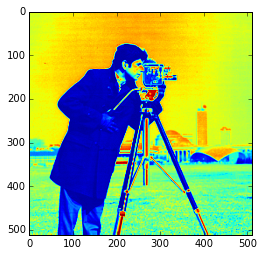

In [42]:
plt.imshow(camera)

##### in gray scales ..

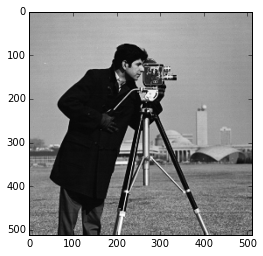

In [43]:
plt.imshow(camera, cmap="gray")

## A. Basic manipulations

Some tasks are inspired by this [page](http://www.scipy-lectures.org/advanced/image_processing/index.html#basic-image)

### A.1 Reversing

In [58]:
def reverse(image, rows = False, columns = True):
    """ 
    Function for reversing an image (per default by columns)
    INPUT : image represented as a matrix
    OUTPUT : image colums reversed 
    """
    result = image
    if rows :
        result = result[::-1,:]        
    if columns : 
        result = result[:,::-1]        
    return result

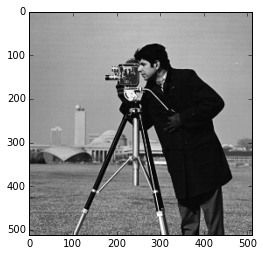

In [59]:
plt.imshow(reverse(camera), cmap="gray")

### A.2 Cropping

In [74]:
def crop(image,x_range,y_range):
    """
    This function aims to reproduce cropping as simply as possible (doesn't handle errors)
    INPUT : image as a matrix, and ranges we want to crop
    OUTPUT : cropped image as a matrix
    """
    result = image 
    result = result[x_range,:]
    result = result[:,y_range]

    return result

In [81]:
cropped_img_up = crop(camera,range(camera.shape[0]/2),range(camera.shape[1]))
cropped_img_down = crop(camera,np.arange(camera.shape[0]/2)+camera.shape[0]/2,range(camera.shape[1]))

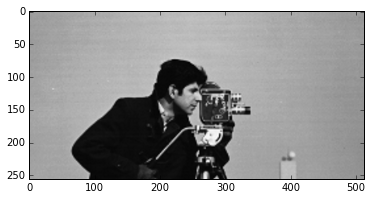

In [82]:
plt.imshow(cropped_img_up, cmap='gray')

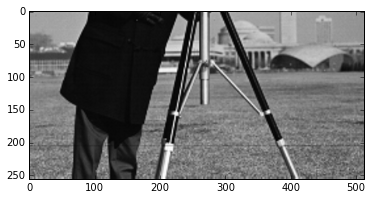

In [83]:
plt.imshow(cropped_img_down, cmap='gray')

In [85]:
cropped_img_left = crop(camera,range(camera.shape[0]),range(camera.shape[1]/2))
cropped_img_right = crop(camera,range(camera.shape[0]),np.arange(camera.shape[1]/2)+camera.shape[1]/2)

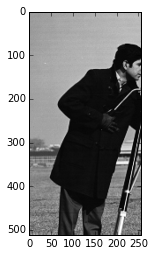

In [86]:
plt.imshow(cropped_img_left,cmap='gray')

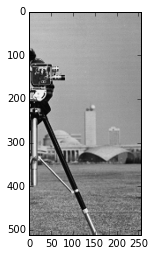

In [87]:
plt.imshow(cropped_img_right,cmap='gray')

### A.3 Sharpening, filtering, denoising etc ...

Not done here because I think they are unuseful for the coco keypoints challenge

### A.4 Edge detection with [sobel filter](https://en.wikipedia.org/wiki/Sobel_operator)

Not useful for augmentation/preprocessing but may be useful for postprocessing

In [94]:
from skimage.filters import sobel

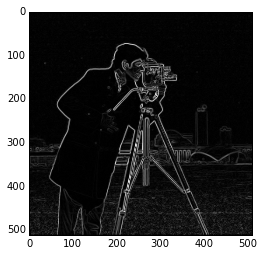

In [96]:
edge_sobel = sobel(camera)
plt.imshow(edge_sobel, cmap='gray')

#### see also [roberts](https://en.wikipedia.org/wiki/Roberts_cross) operator

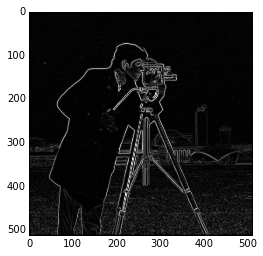

In [97]:
from skimage.filters import roberts
edge_roberts = roberts(camera)
plt.imshow(edge_roberts, cmap='gray')

### A.6 Thresholding

We split the images w.r.t a threshold in order to emphasize different objects inside an image 

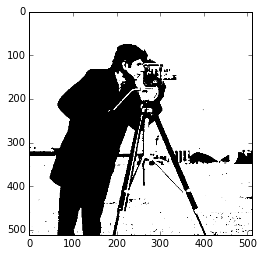

In [99]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(camera)
binary = camera > thresh
plt.imshow(binary, cmap='gray')

### A.7 [Warping](https://en.wikipedia.org/wiki/Image_warping)

In [111]:
from skimage import transform as tf
import math
tform = tf.SimilarityTransform(scale=1, rotation=math.pi / 4,
                               translation=(camera.shape[0] / 2, -100))

rotated = tf.warp(camera, tform)
rotated_inverse = tf.warp(rotated, tform.inverse)
back_rotated = tf.warp(camera, tform.inverse)

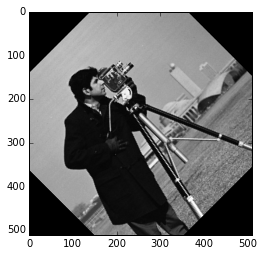

In [109]:
plt.imshow(rotated,cmap='gray')

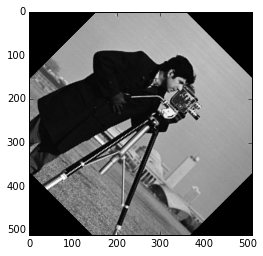

In [110]:
plt.imshow(back_rotated,cmap='gray')

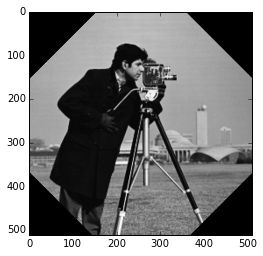

In [113]:
plt.imshow(rotated_inverse, cmap="gray")

### A.8 Resizing

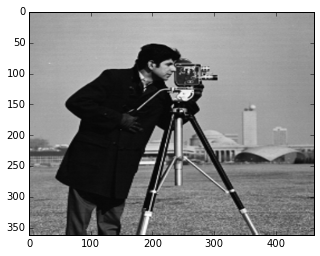

In [116]:
from skimage import transform, util
camera_resized = transform.resize(camera, (camera.shape[0] - 150, camera.shape[1] - 50))
plt.imshow(camera_resized, cmap='gray')